In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import requests
#import dill
from bs4 import BeautifulSoup
#from datetime import datetime
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import XML, fromstring, tostring
# from apscheduler.schedulers.blocking import BlockingScheduler
from datetime import datetime, timedelta
import time
import os

In [2]:
def getTime():
    now = datetime.now()
    current_time = now.strftime("%d%b%Y_%H-%M")
    return current_time

my_path = os.path.abspath("cycleTrackImages_Bengaluru_2/")

def getLineWidth(cn):
    lwd=0
    if(cn>=0.7):
        lwd=6
    elif(cn>=0.5):
        lwd=3
    elif(cn>=0.0):
        lwd=0.1
    return lwd

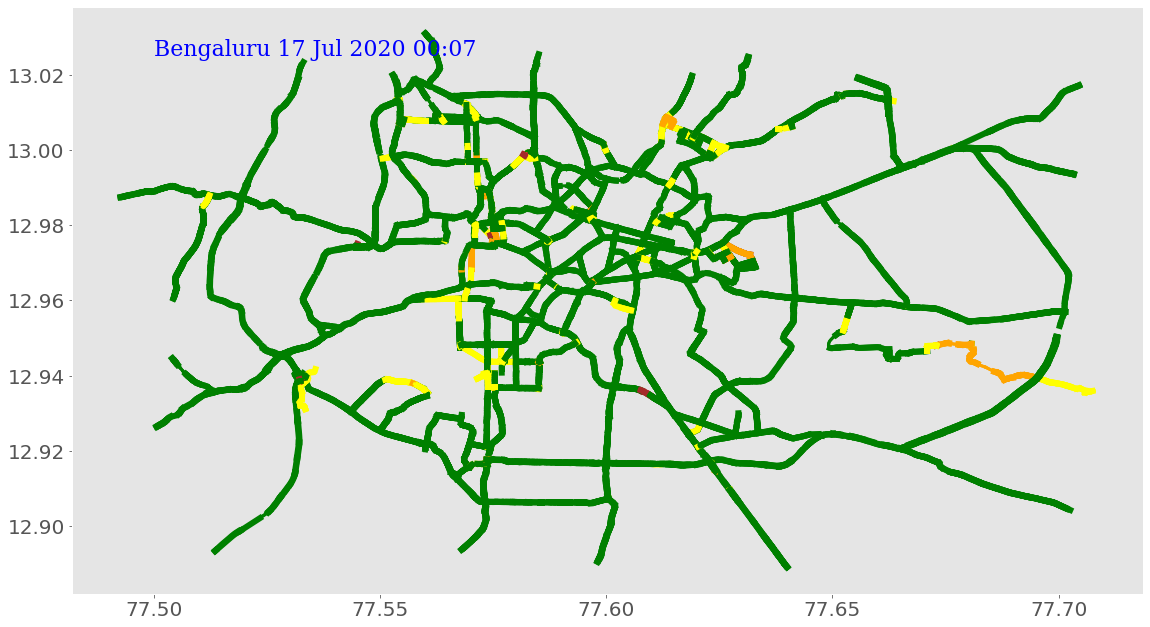

In [3]:
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 22,
        }

def fun():        
    page = requests.get('https://traffic.api.here.com/traffic/6.2/flow.xml?app_id=wvzQzqmPlU1T9tjf0YLU&app_code=b_is4SmSRfh8e0-Mr2-low&bbox=12.907945, 77.512298;13.014777, 77.693619&responseattributes=sh,fc&units=metric')
    soup = BeautifulSoup(page.text, "lxml")
    roads = soup.find_all('fi')
    a1=[]
    loc_list_hv=[]
    lats=[]
    longs=[]
    sus=[]
    ffs=[]
    cns=[]
#     c=0
    for road in roads:
        #for j in range(0,len(shps)):
        myxml = fromstring(str(road))
        fc=5
        for child in myxml:
            #print(child.tag, child.attrib)
            if('fc' in child.attrib):
                fc=int(child.attrib['fc'])
            if('cn' in child.attrib):
                cn=float(child.attrib['cn'])
            if('su' in child.attrib):
                su=float(child.attrib['su'])
            if('ff' in child.attrib):
                ff=float(child.attrib['ff'])
        if((fc<=3) ): #and (cn>=0.7)
            shps=road.find_all("shp")
            for j in range(0,len(shps)):
                latlong=shps[j].text.replace(',',' ').split()
                #loc_list=[]
                la=[]
                lo=[]
                su1=[]
                ff1=[] 
                cn1=[] 
                for i in range(0,int(len(latlong)/2)):
                    loc_list_hv.append([float(latlong[2*i]),float(latlong[2*i+1]),float(su),float(ff),float(cn)])
                    la.append(float(latlong[2*i]))
                    lo.append(float(latlong[2*i+1]))
#                     what is the point of storing a constant value and then taking mean??
                    su1.append(float(su))
                    ff1.append(float(ff))
                    cn1.append(float(cn)) 
                lats.append(la)
                longs.append(lo)
                sus.append(np.mean(su1))
                ffs.append(np.mean(ff1))
                cns.append(np.mean(cn1))
                
    fig=plt.figure(figsize=(19.20,10.80))
    plt.style.use('ggplot')
#     plt.rcParams['axes.facecolor'] = 'gray'
    #plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
    plt.grid(False)
    for i in range(0,len(lats)):
    #     if(sus[i]/ffs[i]<0.25):
    #         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
        if(sus[i]<10):
            plt.plot(longs[i],lats[i], c='brown',linewidth=getLineWidth(cns[i]))
        elif(sus[i]<15):
            plt.plot(longs[i],lats[i], c='orange',linewidth=getLineWidth(cns[i]))
        elif(sus[i]<20):
            plt.plot(longs[i],lats[i], c='yellow',linewidth=getLineWidth(cns[i]))
        else:
            plt.plot(longs[i],lats[i], c='green',linewidth=getLineWidth(cns[i]))
    #print(i)
    #plt.xlim(-77.055,-77.015)
    #plt.ylim(38.885,38.91)
    plt.axis('on')
    # plt.show()
    timeStr=getTime()
    saveFileName="speedProfilesBengaluru_"+timeStr+".png"
    plt.text(77.50, 13.025, "Bengaluru "+datetime.now().strftime("%d %b %Y %H:%M"), fontdict=font)
#     plt.suptitle("Bengaluru "+timeStr, fontdict=font)
#     plt.legend(['<10','10-15','15-20','>20'],loc='upper right',title='speed (kph)')
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.savefig(os.path.join(my_path, saveFileName),dpi=400)
fun()

In [4]:
# a1=[]
# loc_list_hv=[]
# lats=[]
# longs=[]
# sus=[]
# ffs=[]
# c=0
# for road in roads:
#     #for j in range(0,len(shps)):
#     myxml = fromstring(str(road))
#     fc=5
#     for child in myxml:
#         #print(child.tag, child.attrib)
#         if('fc' in child.attrib):
#             fc=int(child.attrib['fc'])
#         if('cn' in child.attrib):
#             cn=float(child.attrib['cn'])
#         if('su' in child.attrib):
#             su=float(child.attrib['su'])
#         if('ff' in child.attrib):
#             ff=float(child.attrib['ff'])
#     if((fc<=2) and (cn>=0.7)):
#         shps=road.find_all("shp")
#         for j in range(0,len(shps)):
#             latlong=shps[j].text.replace(',',' ').split()
#             #loc_list=[]
#             la=[]
#             lo=[]
#             su1=[]
#             ff1=[]
            
#             for i in range(0,int(len(latlong)/2)):
#                 loc_list_hv.append([float(latlong[2*i]),float(latlong[2*i+1]),float(su),float(ff)])
#                 la.append(float(latlong[2*i]))
#                 lo.append(float(latlong[2*i+1]))
#                 su1.append(float(su))
#                 ff1.append(float(ff))
#             lats.append(la)
#             longs.append(lo)
#             sus.append(np.mean(su1))
#             ffs.append(np.mean(ff1))

In [5]:
# fig=plt.figure()
# # plt.style.use('dark_background')
# plt.rcParams['axes.facecolor'] = 'black'
# #plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
# plt.grid(False)
# for i in range(0,len(lats)):
# #     if(sus[i]/ffs[i]<0.25):
# #         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
#     if(sus[i]<30):
#         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
# #     elif(sus[i]/ffs[i]<0.5):
# #         plt.plot(longs[i],lats[i], c='red',linewidth=0.5)
# #     elif(sus[i]/ffs[i]<0.75):
# #         plt.plot(longs[i],lats[i], c='yellow',linewidth=0.5)
#     else:
#         plt.plot(longs[i],lats[i], c='green',linewidth=0.5)
#     #print(i)
# #plt.xlim(-77.055,-77.015)
# #plt.ylim(38.885,38.91)
# plt.axis('off')
# # plt.show()
# plt.savefig('books_read.png')

In [6]:
# while 1:
#     fun()
#     dt = datetime.now() + timedelta(hours=1)
#     dt = dt.replace(minute=1)
#     while datetime.now() < dt:
#         time.sleep(1)

In [7]:
import sys
!{sys.executable} -m pip install schedule

In [ ]:
import schedule
import time
schedule.every(15).minutes.do(fun)
while True:
    schedule.run_pending()
    time.sleep(1)